In [26]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import regularizers
import numpy as np

def build_model(units = 16, dropout = False, L2 = False):
    model = models.Sequential()
    
    if dropout == True and L2 == True:
        model.add(layers.Dense(units, kernel_regularizer=regularizers.l2(0.001), activation = 'relu', input_shape = (10000, )))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(units, kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(1, activation = 'sigmoid'))
    
    elif dropout == True:
        model.add(layers.Dense(units, activation = 'relu', input_shape = (10000, )))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(units, activation = 'relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(1, activation = 'sigmoid'))
        
    elif L2 == True:
        model.add(layers.Dense(units, kernel_regularizer=regularizers.l2(0.001), activation = 'relu', input_shape = (10000, )))
        model.add(layers.Dense(units, kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
        model.add(layers.Dense(1, activation = 'sigmoid'))
        
    else:
        model.add(layers.Dense(units, activation = 'relu', input_shape = (10000, )))
        model.add(layers.Dense(units, activation = 'relu'))
        model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics = ['acc'])
              
    return model

def vectorize_sequence(sequence, dimension = 10000):
    tensor = np.zeros((len(sequence), dimension), dtype = 'float32')
    
    for i, word in enumerate(sequence):
        tensor[i, word] = 1
        
    return tensor
              
(x_data, y_data), (x_test, y_test) = imdb.load_data(num_words = 10000)

x_data = vectorize_sequence(x_data)
y_data = np.asarray(y_data).astype('float32')
x_test = vectorize_sequence(x_test)
y_test = np.asarray(y_test).astype('float32')

x_val = x_data[:10000]
y_val = y_data[:10000]
x_train = x_data[10000:]
y_train = y_data[10000:]

# --------------------------------------------------------
print("Model with 16 units")
model_16 = build_model()
n_epochs = 20

history = model_16.fit(x_train,
                       y_train,
                       epochs = n_epochs,
                       batch_size = 512,
                       validation_data = (x_val, y_val),
                       verbose = 0)

history_16 = history.history

# --------------------------------------------------------
print("Model with 4 units")
model_4 = build_model(4)

history = model_4.fit(x_train,
                      y_train,
                      epochs = n_epochs,
                      batch_size = 512,
                      validation_data = (x_val, y_val),
                      verbose = 0)

history_4 = history.history

# --------------------------------------------------------
print("Model with 16 units and dropout")
model_16_drop = build_model(16, True)

history = model_16_drop.fit(x_train,
                            y_train,
                            epochs = n_epochs,
                            batch_size = 512,
                            validation_data = (x_val, y_val),
                            verbose = 0)

history_16_drop = history.history

# --------------------------------------------------------
print("Model with 16 units and weight regularization")

model_16_L2 = build_model(16, False, True)

history = model_16_L2.fit(x_train,
                         y_train,
                         epochs = n_epochs,
                         batch_size = 512,
                         validation_data = (x_val, y_val),
                         verbose = 0)

history_16_L2 = history.history

# --------------------------------------------------------
print("Model with 16 units, dropout and weight regularization")

model_16_drop_L2 = build_model(16, True, True)

history = model_16_drop_L2.fit(x_train,
                              y_train,
                              epochs = n_epochs,
                              batch_size = 512,
                              validation_data = (x_val, y_val),
                              verbose = 0)

history_16_drop_L2 = history.history

Model with 16 units
Model with 4 units
Model with 16 units and dropout
Model with 16 units and weight regularization
Model with 16 units, dropout and weight regularization


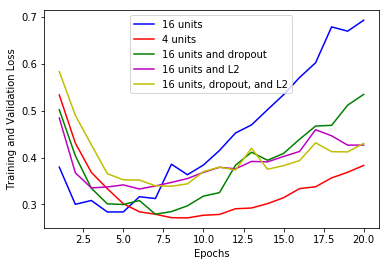

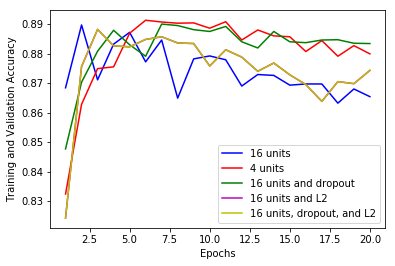

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(1, n_epochs+1), history_16['val_loss'], 'b', label = "16 units")
plt.plot(range(1, n_epochs+1), history_4['val_loss'], 'r', label = "4 units")
plt.plot(range(1, n_epochs+1), history_16_drop['val_loss'], 'g', label = "16 units and dropout")
plt.plot(range(1, n_epochs+1), history_16_L2['val_loss'], 'm', label = "16 units and L2")
plt.plot(range(1, n_epochs+1), history_16_drop_L2['val_loss'], 'y', label = "16 units, dropout, and L2")
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(range(1, n_epochs+1), history_16['val_acc'], 'b', label = "16 units")
plt.plot(range(1, n_epochs+1), history_4['val_acc'], 'r', label = "4 units")
plt.plot(range(1, n_epochs+1), history_16_drop['val_acc'], 'g', label = "16 units and dropout")
plt.plot(range(1, n_epochs+1), history_16_L2['val_acc'], 'm', label = "16 units and L2")
plt.plot(range(1, n_epochs+1), history_16_L2['val_acc'], 'y', label = "16 units, dropout, and L2")
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Accuracy')
plt.legend()
plt.show()

In [30]:
# --------------------------------------------------------
print("Model with 16 units")
model_16 = build_model()

model_16.fit(x_data,
             y_data,
             epochs = 4,
             batch_size = 512,
             verbose = 0)

loss, accuracy = model_16.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy", accuracy, "\n")

# --------------------------------------------------------
print("Model with 4 units")
model_4 = build_model(4)

model_4.fit(x_data,
            y_data,
            epochs = 9,
            batch_size = 512,
            verbose = 0)

loss, accuracy = model_16.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy", accuracy, "\n")

# --------------------------------------------------------
print("Model with 16 units and dropout")
model_16_drop = build_model(16, True)

model_16_drop.fit(x_data,
                  y_data,
                  epochs = 7,
                  batch_size = 512,
                  verbose = 0)

loss, accuracy = model_16_drop.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy", accuracy, "\n")

# --------------------------------------------------------
print("Model with 16 units and weight regularization")

model_16_L2.fit(x_data,
                y_data,
                epochs = 6,
                batch_size = 512,
                verbose = 0)

loss, accuracy = model_16_L2.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy", accuracy, "\n")

# --------------------------------------------------------
print("Model with 16 units, dropout and weight regularization")

model_16_drop_L2.fit(x_data,
                     y_data,
                     epochs = 7,
                     batch_size = 512,
                     verbose = 0)

loss, accuracy = model_16_drop_L2.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy", accuracy, "\n")

Model with 16 units
25000/25000 [==============================] - 3s 129us/step
Loss: 0.2928350234222412
Accuracy 0.8838 

Model with 4 units
25000/25000 [==============================] - 3s 103us/step
Loss: 0.2928350234222412
Accuracy 0.8838 

Model with 16 units and dropout
25000/25000 [==============================] - 3s 130us/step
Loss: 0.2880044807624817
Accuracy 0.88832 

Model with 16 units and weight regularization
25000/25000 [==============================] - 3s 106us/step
Loss: 0.4427460708427429
Accuracy 0.8684 

Model with 16 units, dropout and weight regularization
25000/25000 [==============================] - 3s 105us/step
Loss: 0.43729416138648985
Accuracy 0.8782 

